In [1]:
import numpy as np
import matplotlib.pyplot as plt
import cv2
import os
import torch
from torchvision import models, datasets
from torch.autograd import Variable

#from data_utils.data_setup import get_imagenet_test, get_top_prediction, get_imagenet_classes
from techniques.gen_patch import gen_adversarial_patch
from metrics.utils import *
from techniques.utils import get_displ_img
#from techniques.generate_grounding import gen_grounding

datadir = '../data/test/'
#datadir = '../data/ILSVRC2012_img_val/'
save_path='../results/explanation_examples/'

In [2]:
from techniques.generate_grounding import gen_grounding, gen_grounding_gcam, gen_grounding_gcam_batch

In [3]:
displ_img = cv2.imread('/work/lisabdunlap/explain-eval/data/samples/cat_dog.png')

# Mask/Heatmap Methods

### Grad-Cam

result path: ./cat_dog/
	#0: boxer (0.42589)
	#0: bull_mastiff (0.26502)
	#0: tiger_cat (0.17546)
saving explanation mask....

error saving explanation
saved to ./cat_dog/gcam-resnet18


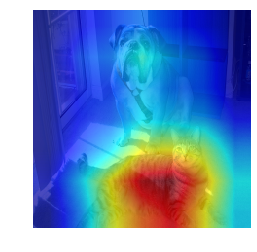

In [5]:
gcam_expl = gen_grounding(displ_img, 'gcam', 'cat_dog', 'resnet18', target_index=3, show=True, save=True, save_path='./', device=5)

### LIME

result path: /work/lisabdunlap/explain-eval/results/different_architectures/cat_dog/
lime classsification: 254
finished lime explanation
saving explanation mask....

saved to /work/lisabdunlap/explain-eval/results/different_architectures/cat_dog/lime-vgg19


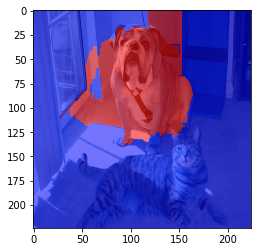

In [5]:
lime_expl= gen_grounding(displ_img, 'lime', 'cat_dog', 'resnet18', target_index=1, show=True, save=True, save_path='/work/lisabdunlap/explain-eval/results/different_architectures/')

### RISE

result path: ./cat_dog/


Generating filters:   0%|          | 19/6000 [00:00<00:32, 186.44it/s]

Current cuda device  0


Generating filters: 100%|██████████| 6000/6000 [00:17<00:00, 321.91it/s]


Masks are generated.
finished RISE
saving explanation mask....

error saving explanation
saved to ./cat_dog/rise-resnet18


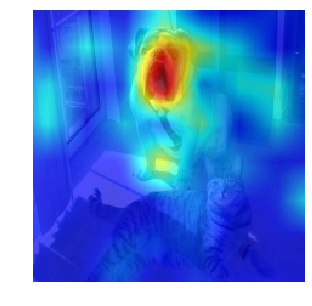

In [6]:
gcam_expl = gen_grounding(displ_img, 'rise', 'cat_dog', 'resnet18', target_index=1, show=True, save=True, save_path='./', device=5)

# Saliency Methods

### Integrated Gradients

result path: /work/lisabdunlap/explain-eval/results/different_architectures/cat_dog/
resnet18


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


len of attr 46714 and sum 3462 for 0.001
len of attr 47839 and sum 2337 for 0.1
len of attr 48515 and sum 1661 for 0.2
len of attr 46714 and sum 3462 for 0.001
len of attr 47839 and sum 2337 for 0.1
len of attr 48515 and sum 1661 for 0.2


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


len of attr 46813 and sum 3363 for 0.001
len of attr 48016 and sum 2160 for 0.1
len of attr 48679 and sum 1497 for 0.2
len of attr 46813 and sum 3363 for 0.001
len of attr 48016 and sum 2160 for 0.1
len of attr 48679 and sum 1497 for 0.2
finished Integrated Gradients explanation
saving explanation mask....



NameError: name 'model_name' is not defined

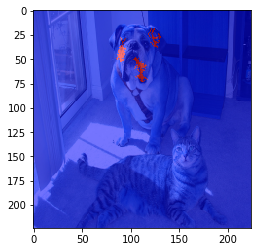

In [6]:
lime_expl= gen_grounding(displ_img, 'ig', 'cat_dog', 'resnet18', show=True, save=False, save_path='/work/lisabdunlap/explain-eval/results/different_architectures/')

result path: ../results/explanation_examples/white_car/white_car1/
integrated gradients clasification: convertible


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


finished Integrated Gradients explanation
saving explanation mask

saved to ../results/explanation_examples/white_car/white_car1/ig-vgg19
------------------------------


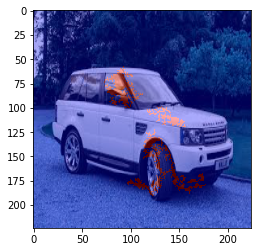

In [17]:
displ_img = cv2.imread('../data/samples/white_car.jpg')
displ_img = cv2.resize(displ_img, (224, 224))
ig_expl = gen_grounding(displ_img, 'vgg19', 'ig', 'white_car', show=True, save_path=save_path, label_index=i)

# Get Stats

In [56]:
iou_pix, cos_dist, js_dist, tvd, cc = get_stats(np.float32(ig_mask), lime_mask, threshold=10)

pixel count IoU: 0.004022191400832178
cos similarity: 0.8182256808217385
Jenson Shannon dist: 0.7215742216816708
total variation distance: 0.9933854557551773
Pearsons Correlation Coefficient: -0.05971653644705394
------------------------------


## Calculate IoU

In [ ]:
from techniques.utils import calc_iou, weight_mask

In [ ]:
iou, intersection, union = calc_iou(gcam_mask, lime_mask, threshold=50, num_pixels=True)
print("IoU pixel value sum: {0}".format(iou))

#### Check IoU

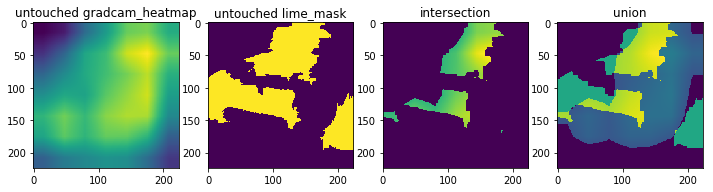

In [87]:
_, axs = plt.subplots(1, 4, figsize=(12, 12))
axs = axs.flatten()
imgs = [gcam_mask, lime_mask, intersection, union]
labels = ['untouched gradcam_heatmap', 'untouched lime_mask', 'intersection', 'union']
for img, ax, label in zip(imgs, axs, labels):
    ax.set_title(label)
    ax.imshow(img)
plt.show()